In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns


In [3]:
import math

In [4]:
cancer_df = pd.read_csv('risk_factors_cervical_cancer.csv')

In [5]:
cancer_df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


In [6]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
Age                                   858 non-null int64
Number of sexual partners             858 non-null object
First sexual intercourse              858 non-null object
Num of pregnancies                    858 non-null object
Smokes                                858 non-null object
Smokes (years)                        858 non-null object
Smokes (packs/year)                   858 non-null object
Hormonal Contraceptives               858 non-null object
Hormonal Contraceptives (years)       858 non-null object
IUD                                   858 non-null object
IUD (years)                           858 non-null object
STDs                                  858 non-null object
STDs (number)                         858 non-null object
STDs:condylomatosis                   858 non-null object
STDs:cervical condylomatosis          858 non-null object
STDs:vaginal condylomatosi

Starting the data process. Filling the missing values based on the type of the data. Removing the columns which has most of the missing data. 

In [7]:
## dropping two columns of STDs as it does not give much information because of missing data

cancer_df.drop(['STDs: Time since first diagnosis','STDs: Time since last diagnosis'],inplace=True,axis=1)

In [8]:
cancer_df.head(5)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,0.0,0,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0


In [9]:
cancer_df.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')

In [10]:
numerical_df = ['Age', 'Number of sexual partners', 'First sexual intercourse','Num of pregnancies', 'Smokes (years)',
                'Smokes (packs/year)','Hormonal Contraceptives (years)','IUD (years)','STDs (number)']
categorical_df = ['Smokes','Hormonal Contraceptives','IUD','STDs','STDs:condylomatosis','STDs:cervical condylomatosis',
                  'STDs:vaginal condylomatosis','STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
                  'STDs:pelvic inflammatory disease', 'STDs:genital herpes','STDs:molluscum contagiosum', 'STDs:AIDS', 
                  'STDs:HIV','STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis','Dx:Cancer', 'Dx:CIN', 
                  'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller','Citology', 'Biopsy']

In [11]:
cancer_df = cancer_df.replace('?', np.NaN)

In [12]:
### Filling the missing values of numeric data columns with mean of the column data.
for feature in numerical_df:
    print(feature,'',cancer_df[feature].convert_objects(convert_numeric=True).mean())
    feature_mean = round(cancer_df[feature].convert_objects(convert_numeric=True).mean(),1)
    cancer_df[feature] = cancer_df[feature].fillna(feature_mean)
    

   

Age  26.82051282051282
Number of sexual partners  2.527644230769231
First sexual intercourse  16.995299647473562
Num of pregnancies  2.275561097256858
Smokes (years)  1.2197214125857985
Smokes (packs/year)  0.45314395064923096
Hormonal Contraceptives (years)  2.2564192013893343
IUD (years)  0.514804318488529
STDs (number)  0.17662682602921648


C:\Users\mamid\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  app.launch_new_instance()
C:\Users\mamid\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


In [13]:
for feature in categorical_df:
    
    cancer_df[feature] = cancer_df[feature].convert_objects(convert_numeric=True).fillna(1.0)

C:\Users\mamid\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  app.launch_new_instance()


In [14]:
cancer_df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
2,34,1.0,17,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,0.0,0,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0


In [15]:
category_df = ['Hinselmann', 'Schiller','Citology', 'Biopsy']

C:\Users\mamid\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


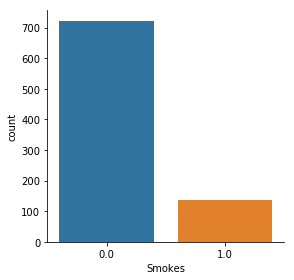

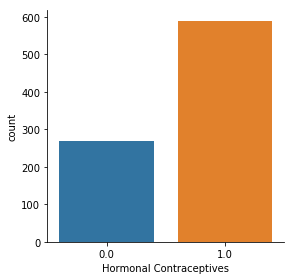

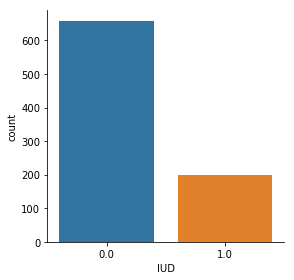

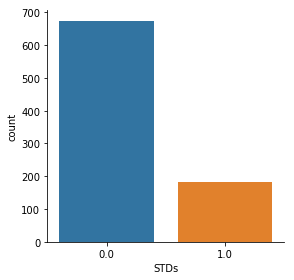

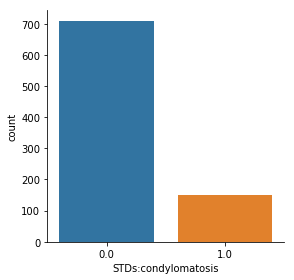

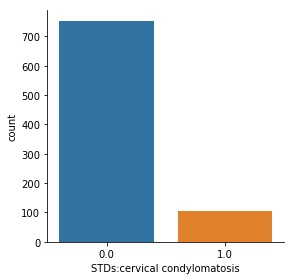

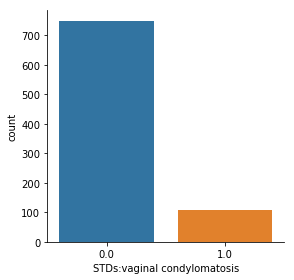

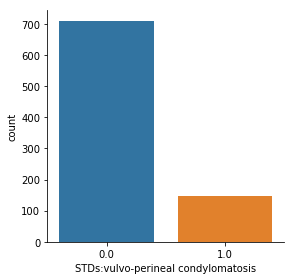

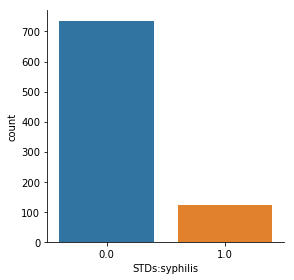

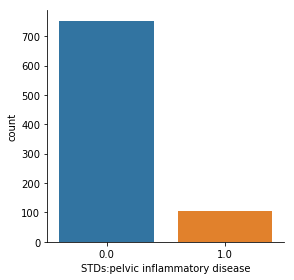

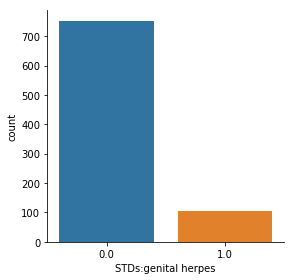

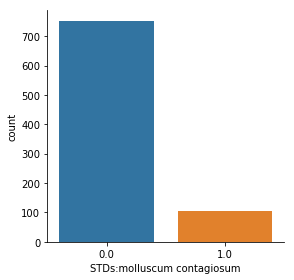

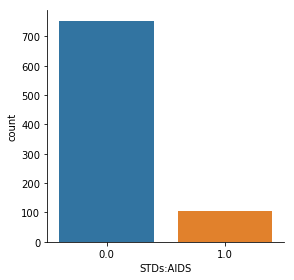

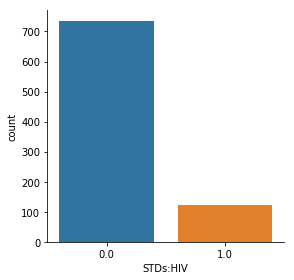

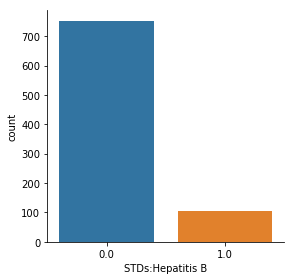

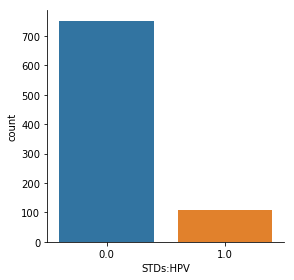

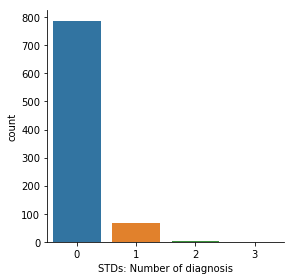

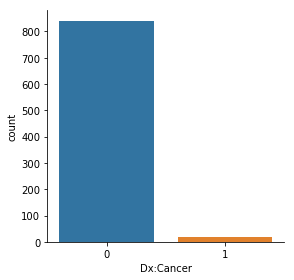

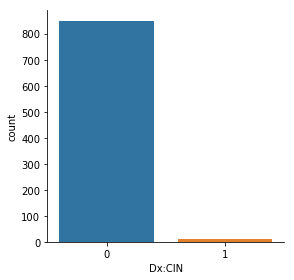

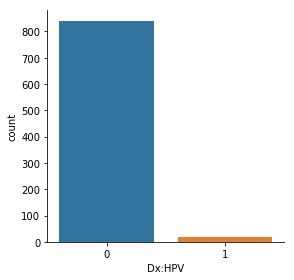

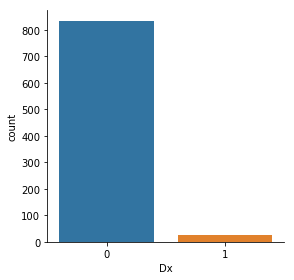

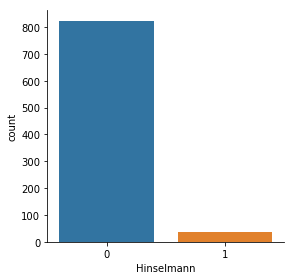

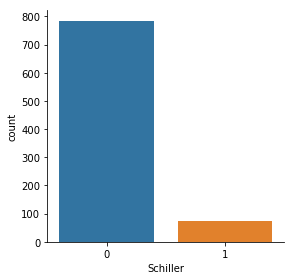

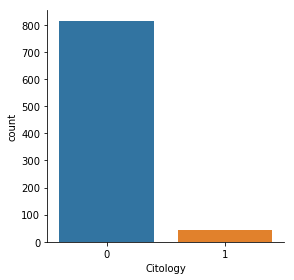

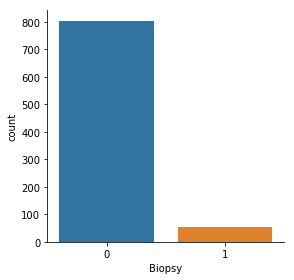

In [16]:
for feature in categorical_df:
   sns.factorplot(feature,data=cancer_df,kind='count')



From the above graphs it can be seen that Harmonal Contraceptive column has the highest number of one's which indicate that this might be the important key feature in detecting the cervical cancer. So let us concentrate on this feature more in future analysis.

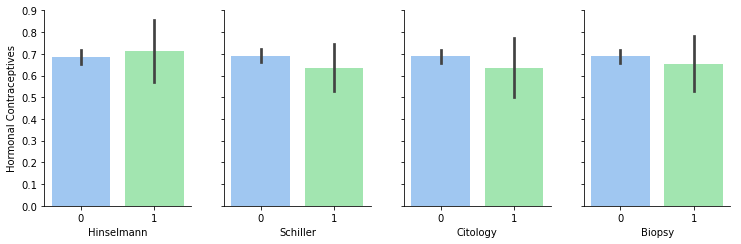

In [761]:
g = sns.PairGrid(cancer_df,
                 y_vars=['Hormonal Contraceptives'],
                 x_vars= category_df,
                 aspect=.75, size=3.5)
g.map(sns.barplot, palette="pastel");

In [762]:
cancer_df['Number of sexual partners'] = round(cancer_df['Number of sexual partners'].convert_objects(convert_numeric=True))
cancer_df['First sexual intercourse'] = cancer_df['First sexual intercourse'].convert_objects(convert_numeric=True)
cancer_df['Num of pregnancies']=round(cancer_df['Num of pregnancies'].convert_objects(convert_numeric=True))
cancer_df['Smokes'] = cancer_df['Smokes'].convert_objects(convert_numeric=True)
cancer_df['Smokes (years)'] = cancer_df['Smokes (years)'].convert_objects(convert_numeric=True)
cancer_df['Hormonal Contraceptives'] = cancer_df['Hormonal Contraceptives'].convert_objects(convert_numeric=True)
cancer_df['Hormonal Contraceptives (years)'] = cancer_df['Hormonal Contraceptives (years)'].convert_objects(convert_numeric=True)
cancer_df['IUD (years)'] = cancer_df['IUD (years)'].convert_objects(convert_numeric=True)

print('minimum:',min(cancer_df['Hormonal Contraceptives (years)']))
print('maximum:',max(cancer_df['Hormonal Contraceptives (years)']))

minimum: 0.0
maximum: 30.0


C:\Users\mamid\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':
C:\Users\mamid\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app
C:\Users\mamid\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  app.launch_new_instance()
C:\Users\mamid\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Users\mamid\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: con

From the above plots, it can be seen that With the use of Harmonal contraceptives, Hinselmann test positive.

Mean age of the Women facing the risk of Cervical cancer 26.82051282051282


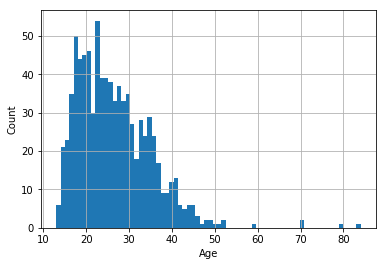

In [763]:
cancer_df['Age'].hist(bins=70)
plt.xlabel('Age')
plt.ylabel('Count')
print('Mean age of the Women facing the risk of Cervical cancer',cancer_df['Age'].mean())

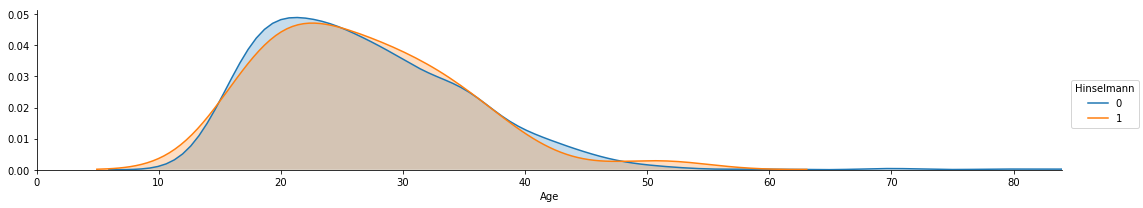

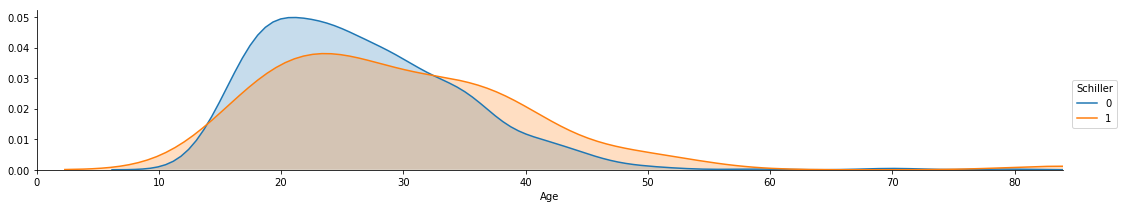

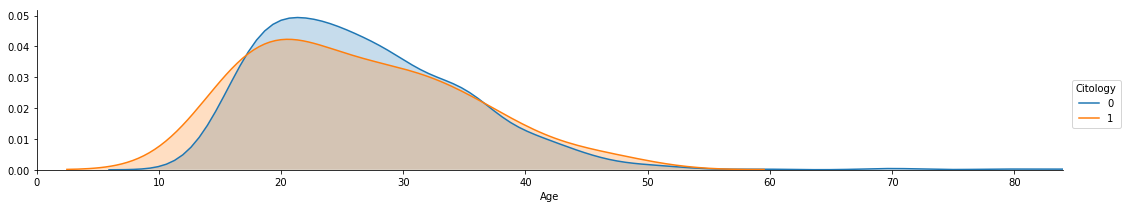

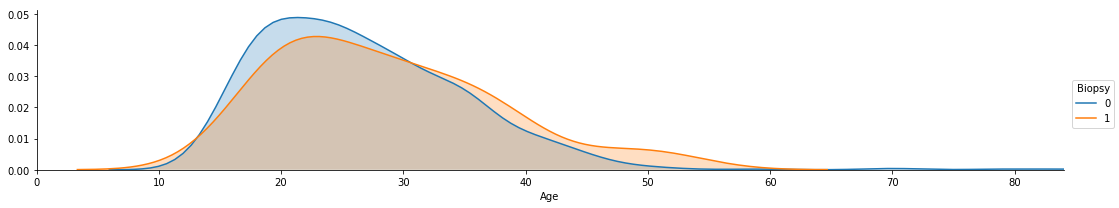

In [764]:
for feature in category_df:

 as_fig = sns.FacetGrid(cancer_df,hue=feature,aspect=5)

 as_fig.map(sns.kdeplot,'Age',shade=True)

 oldest = cancer_df['Age'].max()

 as_fig.set(xlim=(0,oldest))

 as_fig.add_legend()

From the above plots it can be seen that the mean age of the women facing the risk of cervicakl cancer is 26. Also the women with the age in range of 20 to 35 have the highest chances of developing the risk of cervical cancer. The peaks at age of 50 and the furthur extension of the density plot indicate that some of the women face the risk of cervical cancer even at that age.

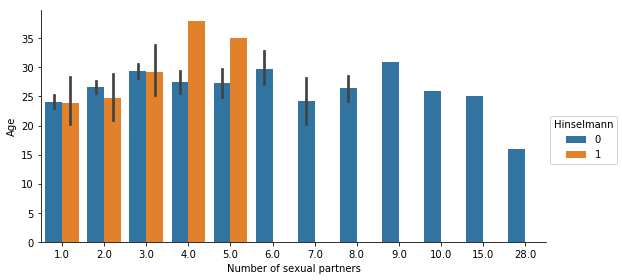

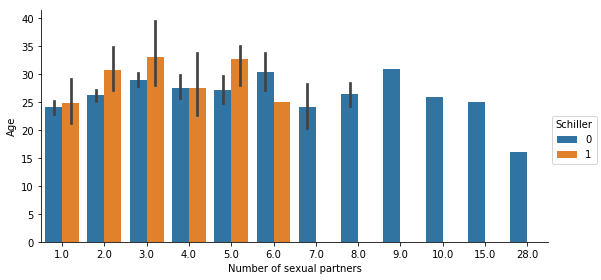

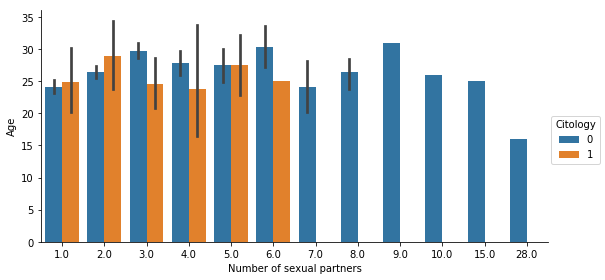

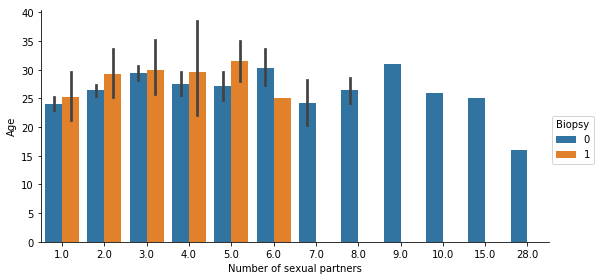

In [765]:
for feature in category_df:
  
  sns.factorplot(x='Number of sexual partners',y='Age',hue=feature,data=cancer_df,aspect=1.95,kind='bar');

As age of women increases, the number of sexual partners increases which increases the possibility of getting tumor. So we can consider that Number of Sexual partners as a key feature in detecting the Cervical Cancer. Even the resources here: https://www.mayoclinic.org/diseases-conditions/cervical-cancer/symptoms-causes/syc-20352501 supports this statement.

C:\Users\mamid\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


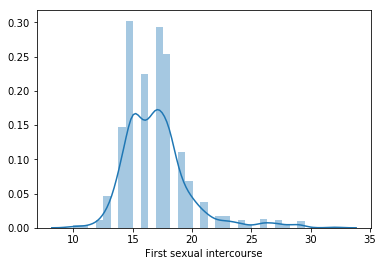

In [766]:
sns.distplot(cancer_df['First sexual intercourse'].convert_objects(convert_numeric=True))
#print('Mean age of the women who started the sexual intercourse',cancer_df['First sexual intercourse'].mean())

Dist plot gives an intuition that most of the women started first sexual intercourse between the age 15 to 20. 

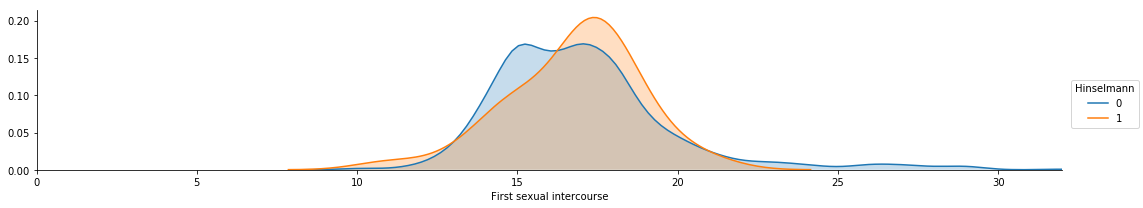

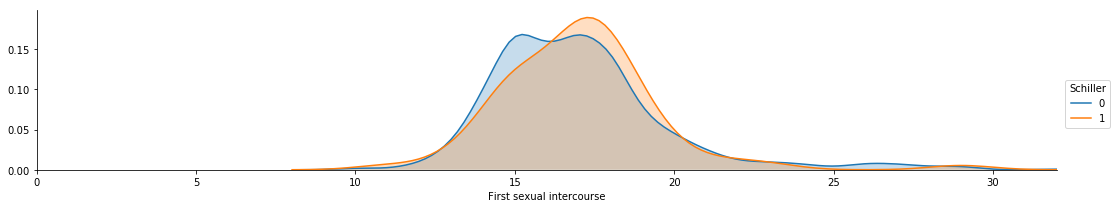

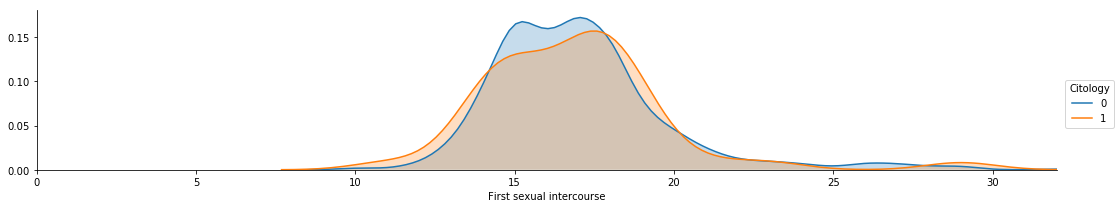

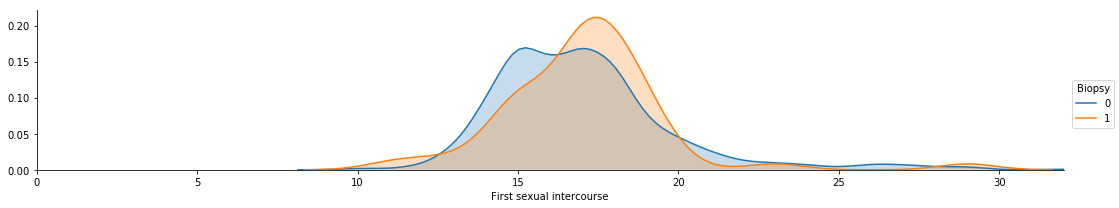

In [767]:

for feature in category_df:

 as_fig = sns.FacetGrid(cancer_df,hue=feature,aspect=5)

 as_fig.map(sns.kdeplot,'First sexual intercourse',shade=True)

 oldest = cancer_df['First sexual intercourse'].max()

 as_fig.set(xlim=(0,oldest))

 as_fig.add_legend()

The density plots shows that the women who started the Sexual intercourse at the age of 15 to 20 are having the high chances of risk. Please refer to the resources here for supporting the statement: https://www.mayoclinic.org/diseases-conditions/cervical-cancer/symptoms-causes/syc-20352501 
So we can consider even this as the key feature in detecting the Cervical cancer.

In [768]:
preg_table = pd.crosstab(index=cancer_df["Hinselmann"], 
                          columns=(cancer_df["Num of pregnancies"],cancer_df['Number of sexual partners']))

preg_table

Num of pregnancies        0.0              1.0                      ...  6.0   \
Number of sexual partners  1.0 2.0 3.0 4.0  1.0 2.0 3.0 4.0 5.0 6.0 ...   5.0   
Hinselmann                                                          ...         
0                            5   5   5   1   81  86  49  25  13   2 ...     1   
1                            0   0   0   0    4   1   2   0   0   0 ...     0   

Num of pregnancies            7.0              8.0      10.0 11.0  
Number of sexual partners 6.0  1.0 2.0 3.0 5.0  3.0 4.0  1.0  3.0  
Hinselmann                                                         
0                           1    1   3   1   1    1   1    1    1  
1                           0    0   0   0   0    0   0    0    0  

[2 rows x 58 columns]

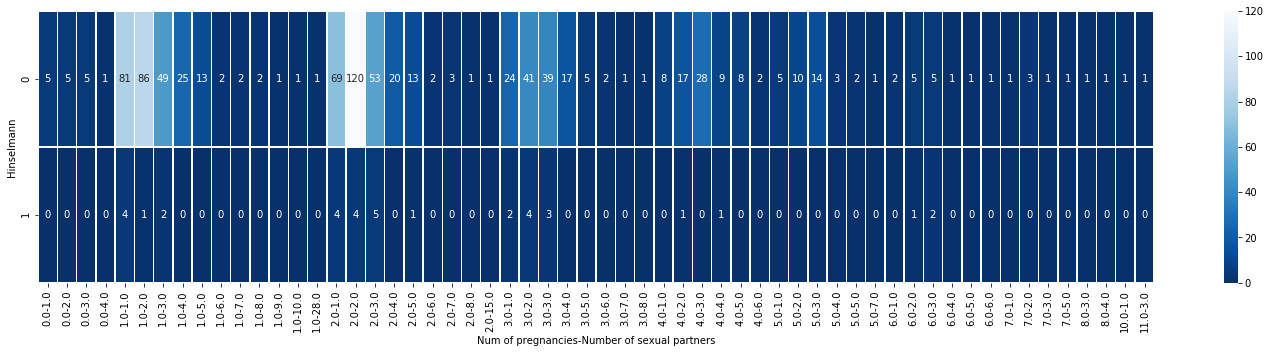

In [769]:
fig, ax = plt.subplots(figsize=(25,5))  
sns.heatmap(preg_table,annot=True, fmt="d",cmap="Blues_r",linewidths=0.5,ax=ax)

In [770]:
##### Just checking to see if there is any relation between number of pregnancies and number of sexual partners
cancer_df['Number of sexual partners'].corr(cancer_df['Num of pregnancies'])

0.077439212509333874

In [771]:

cancer_df['Smokes (packs/year)'] = cancer_df['Smokes (packs/year)'].convert_objects(convert_numeric=True)
print('Correlation between Smokes and Smokes (years) feature:',cancer_df['Smokes'].corr(cancer_df['Smokes (years)']))
print('Correlation between Smokes and Smokes (packs/year) feature:',cancer_df['Smokes'].corr(cancer_df['Smokes (packs/year)']))

Correlation between Smokes and Smokes (years) feature: 0.692798310582
Correlation between Smokes and Smokes (packs/year) feature: 0.473524062274


C:\Users\mamid\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app


From the three columns/features (Smokes, Smokes (years), Smokes (packs/year)) we can remove the column Smokes because Smokes (years) will represent the Smokes column because Smoke (years) column has non-zero value only when Smokes column has non-zero value. Also, the predictions depends on the number of years the person is smoking rather than just whether the smokes or not.

In [772]:
## removing the smokes column from the dataframe.

cancer_df.drop('Smokes',axis=1,inplace=True)

In [773]:
smokes_table = pd.crosstab(index=cancer_df["Schiller"], 
                          columns=(cancer_df["Smokes (years)"]))
#smokes_table.to_csv('smokes.csv',sep=',')

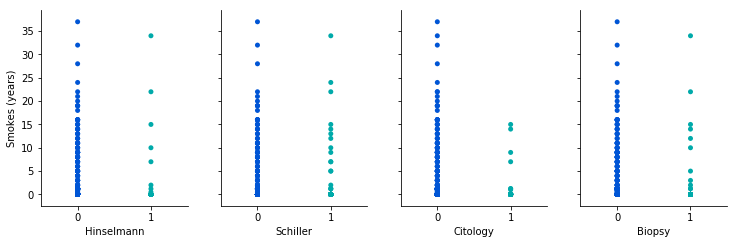

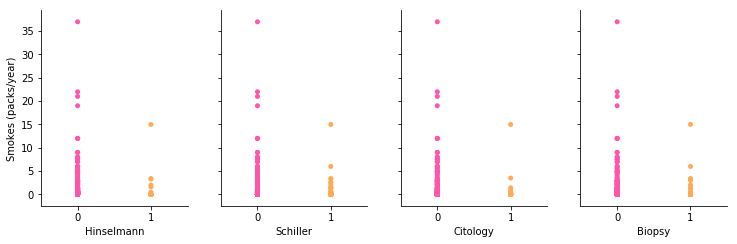

In [774]:
g = sns.PairGrid(cancer_df,
                 y_vars=['Smokes (years)'],
                 x_vars= category_df,
                 aspect=.75, size=3.5)
g.map(sns.stripplot, palette="winter");

g = sns.PairGrid(cancer_df,
                 y_vars=['Smokes (packs/year)'],
                 x_vars= category_df,
                 aspect=.75, size=3.5)
g.map(sns.stripplot, palette="spring");

Based on the distribution of data points in the scatter plot, the schiller and Biopsy tests are showing that women who are smoking for more than 5 years are having more chances of getting the tumor.

In [775]:
#### Similar study as Smokes can be conducted for other features like Harmonal Contraceptives etc.


cancer_df.drop('Hormonal Contraceptives',axis=1,inplace=True)

In [776]:
harmones_table = pd.crosstab(index=cancer_df["Schiller"], 
                          columns=(cancer_df["Hormonal Contraceptives (years)"]))
#harmones_table.to_csv('harmones.csv',sep=',')

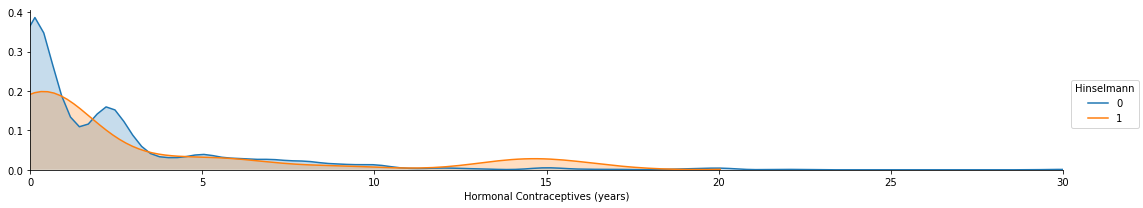

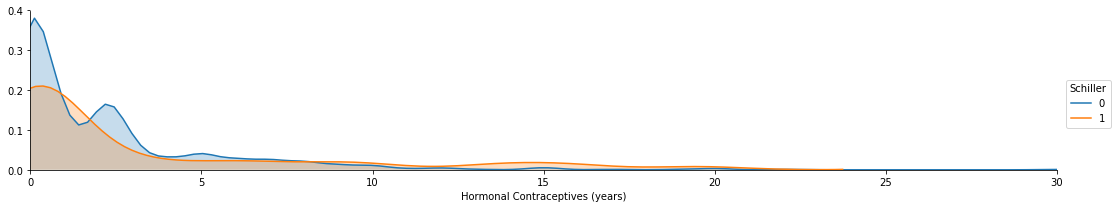

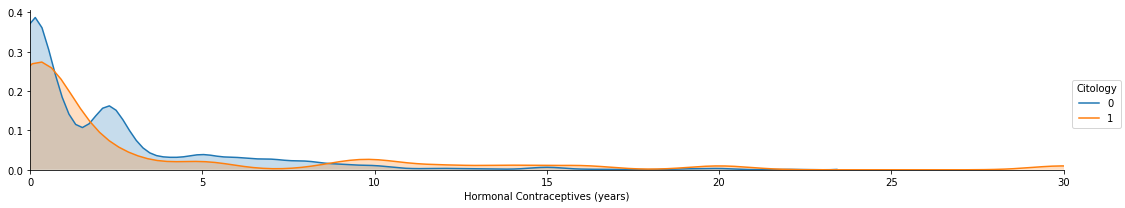

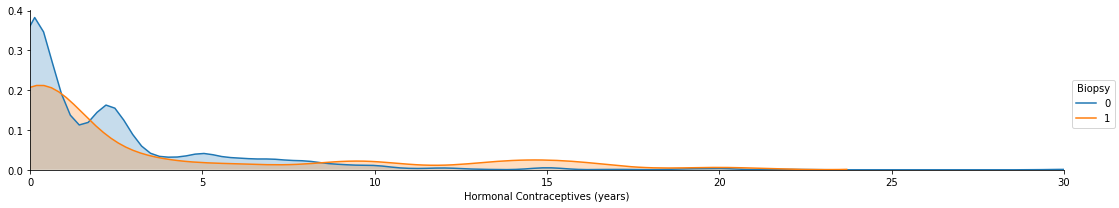

In [777]:
for feature in category_df:

 as_fig = sns.FacetGrid(cancer_df,hue=feature,aspect=5)

 as_fig.map(sns.kdeplot,'Hormonal Contraceptives (years)',shade=True)

 oldest = cancer_df['Hormonal Contraceptives (years)'].max()

 as_fig.set(xlim=(0,oldest))

 as_fig.add_legend()

Women who have taken the harmonal contraceptives for more than five years have the higher risk of cervical cancer. The small peaks at the age 10 & 15 shows even higher risk than women who have not used the contraceptives. The resources here: https://www.cancer.gov/about-cancer/causes-prevention/risk/hormones/oral-contraceptives-fact-sheet#q6 shows the studies supporting the statement that women face higher risk of cervical cancer if they used harmonal contraceptives. So, we can consider that this feature has the high correlation and should be used in furthur analysis.

In [778]:
### Dropping IUD column because IUD (years) has a non-zero value only if IUD is non-zero.

cancer_df.drop('IUD',axis=1,inplace=True)

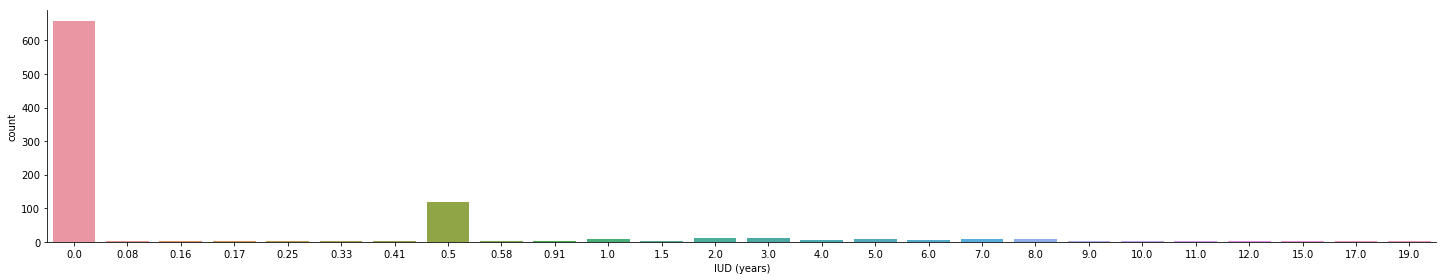

In [779]:

sns.factorplot('IUD (years)',data=cancer_df,kind='count',aspect=5)

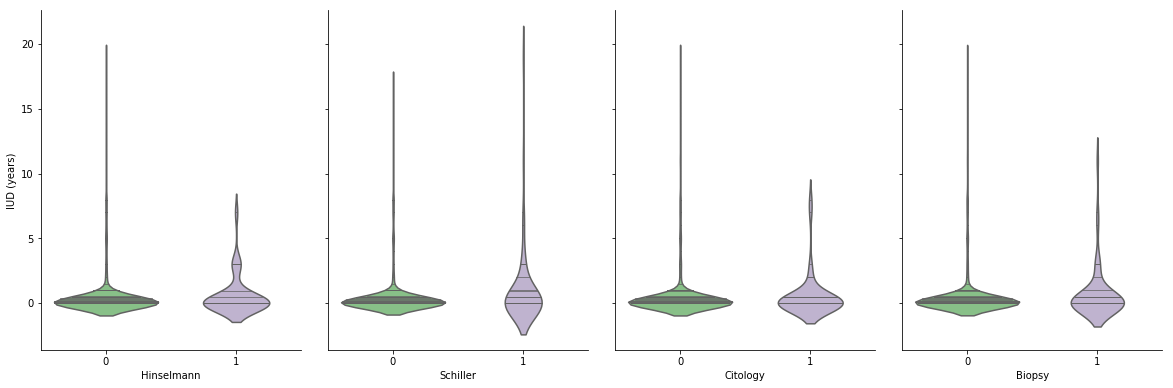

In [780]:
g = sns.PairGrid(cancer_df,
                 y_vars=['IUD (years)'],
                 x_vars= category_df,
                 aspect=.75, size=5.5)
g.map(sns.violinplot, palette="Accent",inner='stick');

The distribution of zero(negative test result) shows that the IUD used for any number of years has less chance of facing risk of cancer. Latest studies says that Women Who Use IUDs May Have Lower Risk of Cervical Cancer. Resource: https://www.livescience.com/60881-iuds-may-lower-risk-of-cervical-cancer.html. So does the presence of IUD feature makes any difference in prediction? lets see!!

In [781]:
HU_table = pd.crosstab(index=cancer_df["Biopsy"], 
                          columns=(cancer_df["IUD (years)"]))

#HU_table.to_csv('IUD.csv',sep=',')

C:\Users\mamid\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


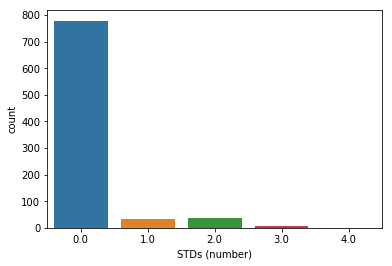

In [782]:
cancer_df['STDs (number)'] = round(cancer_df['STDs (number)'].convert_objects(convert_numeric=True))
sns.countplot('STDs (number)',data=cancer_df)

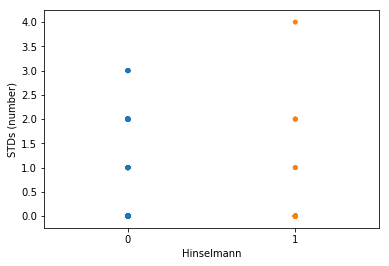

In [783]:
sns.stripplot(x='Hinselmann',y='STDs (number)',data=cancer_df)

In [784]:
std_table = pd.crosstab(index=cancer_df["Hinselmann"], 
                          columns=cancer_df["STDs (number)"])

std_table

STDs (number),0.0,1.0,2.0,3.0,4.0
Hinselmann,,,,,
0,750,32,34,7,0
1,29,2,3,0,1


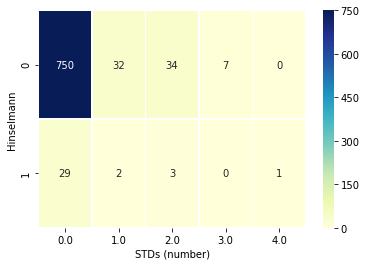

In [785]:
sns.heatmap(std_table,annot=True, fmt="d",cmap="YlGnBu",linewidths=0.5)

In [786]:
std_table_cit = pd.crosstab(index=cancer_df["Citology"], 
                          columns=cancer_df["STDs (number)"])

std_table_sch = pd.crosstab(index=cancer_df["Schiller"], 
                          columns=cancer_df["STDs (number)"])
std_table_bio = pd.crosstab(index=cancer_df["Biopsy"], 
                          columns=cancer_df["STDs (number)"])

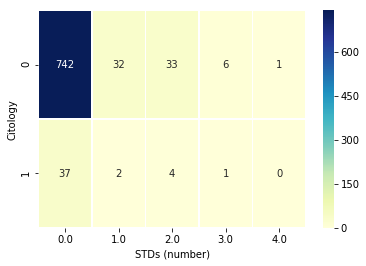

In [787]:
sns.heatmap(std_table_cit,annot=True, fmt="d",cmap="YlGnBu",linewidths=0.5)

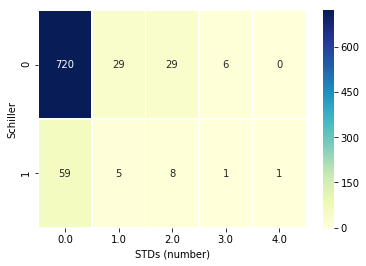

In [788]:
sns.heatmap(std_table_sch,annot=True, fmt="d",cmap="YlGnBu",linewidths=0.5)

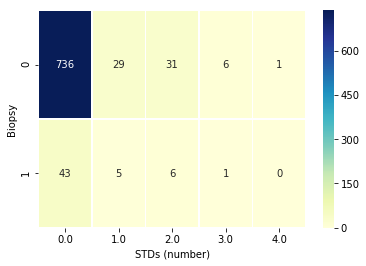

In [789]:
sns.heatmap(std_table_bio,annot=True, fmt="d",cmap="YlGnBu",linewidths=0.5)

In [790]:
cancer_df.drop('Dx',axis=1,inplace=True)

In [791]:
cancer_df.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives (years)', 'IUD (years)', 'STDs',
       'STDs (number)', 'STDs:condylomatosis', 'STDs:cervical condylomatosis',
       'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis',
       'STDs:syphilis', 'STDs:pelvic inflammatory disease',
       'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:AIDS',
       'STDs:HIV', 'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Hinselmann', 'Schiller', 'Citology',
       'Biopsy'],
      dtype='object')

 Starting to build the Machine Learning model with the final features: 'Age', 'Number of sexual partners', 'First sexual intercourse',
 'Num of pregnancies', 'Smokes (years)', 'Smokes (packs/year)', 'Hormonal Contraceptives (years)', 'IUD (years)',
'STDs', 'STDs (number)', 'STDs:condylomatosis', 'STDs:cervical condylomatosis','STDs:vaginal condylomatosis', 
'STDs:vulvo-perineal condylomatosis','STDs:syphilis', 'STDs:pelvic inflammatory disease','STDs:genital herpes',
'STDs:molluscum contagiosum', 'STDs:AIDS','STDs:HIV', 'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
'Dx:Cancer', 'Dx:CIN', 'Dx:HPV',



In [792]:
cancer_df_features = cancer_df.drop(['Hinselmann', 'Schiller', 'Citology','Biopsy'],axis=1)
cancer_df_label = pd.DataFrame(data=cancer_df['Hinselmann'])

In [793]:
cancer_df_label['Schiller'] = cancer_df['Schiller']
cancer_df_label['Citology'] = cancer_df['Citology']
cancer_df_label['Biopsy'] = cancer_df['Biopsy']

In [794]:
def cervical_cancer(cancer_label):
    
    hil, sch, cit, bio = cancer_label
    
    return hil+sch+cit+bio

cancer_df_label['cervical_cancer'] = cancer_df_label[['Hinselmann', 'Schiller', 'Citology','Biopsy']].apply(cervical_cancer,axis=1)

In [795]:
cancer_df_label.drop(['Hinselmann', 'Schiller', 'Citology','Biopsy'],axis=1,inplace=True)
print('Value counts of each target variable:',cancer_df_label['cervical_cancer'].value_counts())
cancer_df_label = cancer_df_label.astype(int)
cancer_df_label = cancer_df_label.values.ravel()

print('Final feature vector shape:',cancer_df_features.shape)
print('Final target vector shape',cancer_df_label.shape)


Value counts of each target variable: 0    756
1     41
3     33
2     22
4      6
Name: cervical_cancer, dtype: int64
Final feature vector shape: (858, 26)
Final target vector shape (858,)


In [796]:
baseline_df = pd.read_csv('risk_factors_cervical_cancer.csv')

In [797]:
baseline_df['cervical_cancer'] = cancer_df_label

In [798]:
baseline_df = baseline_df.replace('?', np.NaN)

In [799]:
for feature in numerical_df:
    print(feature,'',baseline_df[feature].convert_objects(convert_numeric=True).mean())
    feature_mean = round(baseline_df[feature].convert_objects(convert_numeric=True).mean(),1)
    baseline_df[feature] = baseline_df[feature].fillna(feature_mean)
    


Age  26.82051282051282
Number of sexual partners  2.527644230769231
First sexual intercourse  16.995299647473562
Num of pregnancies  2.275561097256858
Smokes (years)  1.2197214125857985
Smokes (packs/year)  0.45314395064923096
Hormonal Contraceptives (years)  2.2564192013893343
IUD (years)  0.514804318488529
STDs (number)  0.17662682602921648


C:\Users\mamid\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app
C:\Users\mamid\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  app.launch_new_instance()


In [800]:
for feature in categorical_df:
    
    baseline_df[feature] = baseline_df[feature].convert_objects(convert_numeric=True).fillna(1.0)

C:\Users\mamid\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  app.launch_new_instance()


In [801]:
baseline_df.drop(['Hinselmann', 'Schiller', 'Citology','Biopsy'],axis=1,inplace=True)

In [802]:
baseline_df_features = baseline_df.drop(['cervical_cancer','STDs: Time since first diagnosis','STDs: Time since last diagnosis'],axis=1)
baseline_df_labels = baseline_df['cervical_cancer']

In [803]:
print(baseline_df_features.shape)
print(baseline_df_labels.shape)
#print(baseline_df_features)

(858, 30)
(858,)


In [813]:
#### cross validation on baseline model (using all 30 features) using Oversampling

from sklearn.model_selection import StratifiedKFold
from sklearn import model_selection
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm


models = []
models.append(('LogisticRegMulti', LogisticRegressionCV(class_weight=None, multi_class='multinomial', solver='newton-cg', max_iter=1000,penalty='l2')))
models.append(('LogisticRegOVR', LogisticRegressionCV(class_weight=None, multi_class='ovr', solver='newton-cg', max_iter=1000,penalty='l2')))
models.append(('svm_linear', svm.LinearSVC(C=1.0,class_weight=None,multi_class='ovr',penalty='l2',max_iter=1000)))
models.append(('svm_rbf', svm.SVC(gamma='auto', C=1.2,degree=4, probability=True,kernel='rbf',decision_function_shape='ovr')))
models.append(('RandomForest',RandomForestClassifier(n_jobs=4, bootstrap=True, class_weight=None, criterion='gini',max_depth=None, max_features='auto', max_leaf_nodes=None,
                         min_samples_leaf=1, min_samples_split=2,min_weight_fraction_leaf=0.0, n_estimators=10, 
                         oob_score=False, random_state=None, verbose=0,warm_start=False)
))

# evaluate each model in turn
results_all = []
names = []
dict_method_score = {}
scoring = 'accuracy'

## oversampling
from imblearn.over_sampling import SMOTE, ADASYN
baseline_df_features_ovr, baseline_df_labels_ovr = SMOTE().fit_sample(baseline_df_features, baseline_df_labels)

print("Results of the baseline model with 30 features:\n")
for name, model in models:
    skfold = StratifiedKFold(n_splits=5, random_state=999)
    cv_results = model_selection.cross_val_score(model, baseline_df_features_ovr, baseline_df_labels_ovr, cv=skfold, scoring=scoring)    
    results_all.append(cv_results)
    names.append(name)
    dict_method_score[name] = (cv_results.mean(), cv_results.std())
    print("{:s}: {:.3f} ({:.3f})".format(name, cv_results.mean(), cv_results.std()))

Results of the baseline model with 30 features:

LogisticRegMulti: 0.559 (0.018)
LogisticRegOVR: 0.557 (0.021)
svm_linear: 0.412 (0.091)
svm_rbf: 0.837 (0.014)
RandomForest: 0.945 (0.033)


In [814]:
### cross validation on 26 features model with oversampling and StratifiedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn import model_selection
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm


models = []
models.append(('LogisticRegMulti', LogisticRegressionCV(class_weight=None, multi_class='multinomial', solver='newton-cg', max_iter=1000,penalty='l2')))
models.append(('LogisticRegOVR', LogisticRegressionCV(class_weight=None, multi_class='ovr', solver='newton-cg', max_iter=1000,penalty='l2')))
models.append(('svm_linear', svm.LinearSVC(C=1.0,class_weight=None,multi_class='ovr',penalty='l2',max_iter=1000)))
models.append(('svm_rbf', svm.SVC(gamma='auto', C=1.2,degree=4, probability=True,kernel='rbf',decision_function_shape='ovr')))
models.append(('RandomForest',RandomForestClassifier(n_jobs=4, bootstrap=True, class_weight=None, criterion='gini',max_depth=None, max_features='auto', max_leaf_nodes=None,
                         min_samples_leaf=1, min_samples_split=2,min_weight_fraction_leaf=0.0, n_estimators=10, 
                         oob_score=False, random_state=None, verbose=0,warm_start=False)
))

# evaluate each model in turn
results_all = []
names = []
dict_method_score = {}
scoring = 'recall_weighted'

## oversampling
from imblearn.over_sampling import SMOTE, ADASYN
cancer_df_features_ovr, cancer_df_label_ovr = SMOTE().fit_sample(cancer_df_features, cancer_df_label)

print('Results of the cross validation on dataset with 26 features:\n')
for name, model in models:
    skfold = StratifiedKFold(n_splits=5, random_state=999)
    cv_results = model_selection.cross_val_score(model, cancer_df_features_ovr, cancer_df_label_ovr, cv=skfold, scoring=scoring)    
    results_all.append(cv_results)
    names.append(name)
    dict_method_score[name] = (cv_results.mean(), cv_results.std())
    print("{:s}: {:.3f} ({:.3f})".format(name, cv_results.mean(), cv_results.std()))

Results of the cross validation on dataset with 26 features:

LogisticRegMulti: 0.520 (0.024)
LogisticRegOVR: 0.499 (0.015)
svm_linear: 0.396 (0.050)
svm_rbf: 0.838 (0.019)
RandomForest: 0.939 (0.031)


In [806]:
### Building a model for future predictions:

random_forest_model = RandomForestClassifier(n_jobs=4, bootstrap=True, class_weight=None, criterion='gini',max_depth=None, max_features='auto', max_leaf_nodes=None,
                         min_samples_leaf=1, min_samples_split=2,min_weight_fraction_leaf=0.0, n_estimators=10, 
                         oob_score=False, random_state=None, verbose=0,warm_start=False)

random_forest_model.fit(cancer_df_features,cancer_df_label)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=4,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [807]:
### Predictions made on the training data:

print('Data Seen in training:',random_forest_model.predict(np.array([[51,3,17,6,34,3.4,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])))
print('Data seen in training:',random_forest_model.predict(np.array([[38,2,15,2,0,0,0.5,19,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])))

Data Seen in training: [3]
Datat seen in training: [1]


In [808]:
### Women with an age of 19, Number of sexual partners:1,First sexual intercourse:17,Num of pregnancies:1,Smokes (years):1, Smokes (packs/year):3.4, 
### Hormonal Contraceptives (years): 0 and all the other features are 0

print('Testing the model on women with age less than 20:',random_forest_model.predict(np.array([[19,1,17,1,1,3.4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])))


Testing the model on women with age less than 20: [0]


In [809]:
### Women with an age of 35, Number of sexual partners:5,First sexual intercourse:11,Num of pregnancies:2,Smokes (years):15, Smokes (packs/year):15, 
### Hormonal Contraceptives (years): 0 and all the other features are 0
print('Testing the model',random_forest_model.predict(np.array([[35,5,11,2,15,15,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])))


Testing the model [4]


In [810]:
### Women with an age of 48, Number of sexual partners:2,First sexual intercourse:15,Num of pregnancies:2,Smokes (years):0, Smokes (packs/year):0, 
### Hormonal Contraceptives (years): 0.5,IUD (years):19,STDs:genital herpes:1 and all the other features are 0

print('Testing the model on Raw Data:',random_forest_model.predict(np.array([[48,2,15,2,0,0,0.5,19,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0]])))

Testing the model on Raw Data: [1]
